In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import itertools as itt
import math

## Propiedad reproductiva de la Normal

*Recordemos cómo es la distribución normal:*

In [2]:
x = np.arange(-5, 5, 0.1)

mu1 = 0
sig1 = 1.
y1 = stats.norm.pdf(x, mu1, sig1)

mu2 = 0
sig2 = 2.
y2 = stats.norm.pdf(x, mu2, sig2)


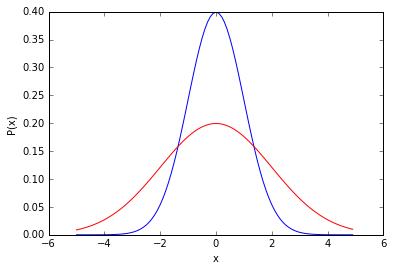

In [3]:
plt.plot(x, y1, "b-")
plt.plot(x, y2, "r-")
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

*Generamos puntos random con una distribución normal:*

In [4]:
X = stats.norm.rvs(loc=0., scale=5., size=100)

In [5]:
X.mean()

-0.17612086118947737

*Ahora muchas veces!*

In [6]:
Nexperiments = 50

mu = 0.
sd = 5.
n = 100

means = []
for _ in range(Nexperiments):
    X = stats.norm.rvs(loc=mu, scale=sd, size=n)
    means.append(X.mean())

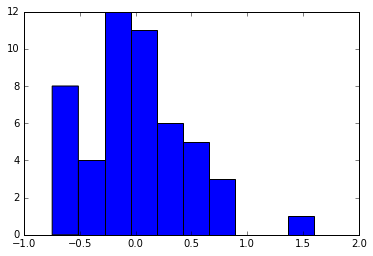

In [7]:
plt.hist(means)
plt.show()

y ahora MAS veces!

In [8]:
Nexperiments = 500

mu = 0.
sd = 5.
n = 100

means = []
for _ in range(Nexperiments):
    X = stats.norm.rvs(loc=mu, scale=sd, size=n)
    means.append(X.mean())

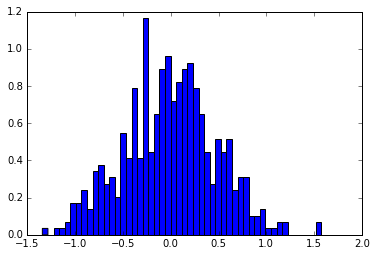

In [9]:
plt.hist(means, bins=50, normed=True)
plt.show()

Comparación con la teoría:

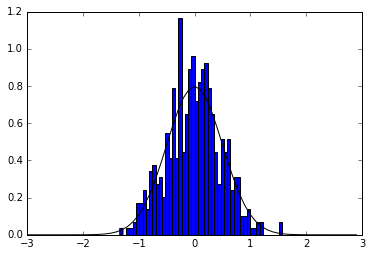

In [10]:
x = np.arange(-3, 3, 0.1)
sd_avg = sd/np.sqrt(n)
f = stats.norm.pdf(x, mu, sd_avg)

plt.hist(means, bins=50, normed=True)
plt.plot(x, f, 'k-')
plt.show()

### Aproximación MonteCarlo para el cálculo de promedios de muchos números


In [11]:
def func(i):
    return np.log(i)


import numpy as np

S = 0
N = 100000

for i in range(N):
    S = S + func(i+1)
    
print S/N

S = 0
K = 10

L = range(N)

for _ in range(K):
    i = np.random.choice(L)
    S = S + func(i+1)
    
print S/K

10.512992219
10.3592629745


# BOOTSTRAP

#### Sorteo una muestra de randoms y quiero estimar la media y el error estándar de la estimación de la media con bootstrap

In [18]:
Nsample = 5

In [19]:
mu = np.pi
sd = 3.

X = stats.norm.rvs(loc=mu, scale=sd, size=Nsample)

#### ...pero hacerlo para n más grande requiere mucho tiempo de cómputo
#### WARNING!  Si se corren las celdas que siguen con Nsample grande (aprox. > 8) se cuelga la laptop!

In [20]:
L = list(itt.combinations_with_replacement(range(Nsample),Nsample))
len(L)

126

... el numero de combinaciones con repetición y sin orden:

In [22]:
math.factorial(2*Nsample-1)/math.factorial(Nsample)/math.factorial(Nsample-1)

126

Ahora hacemos la cuenta con TODAS las combinaciones posibles (Cuidado!  que Nsample sea chico):

In [24]:
#print L[2342]
#print X[list(L[2342])]

In [25]:
means = []

for i in list(itt.combinations_with_replacement(range(Nsample),Nsample)):
    S = X[list(i)]
    means.append(S.mean())

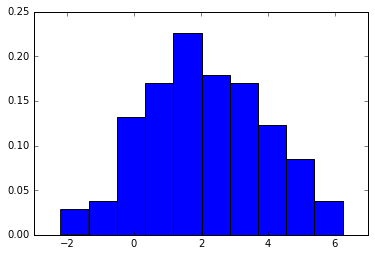

In [26]:
plt.hist(means,  normed=True)
plt.show()

y ahora hacemos la estimación de la "media" con randoms (MonteCarlo):

In [27]:
means_B = []
Nboot = 100

for i in range(Nboot):
    l = np.random.choice(Nsample, size=Nsample)
    S = X[list(l)]
    means_B.append(S.mean())

In [28]:
np.random.choice(Nsample, size=Nsample)

array([0, 2, 4, 2, 3])

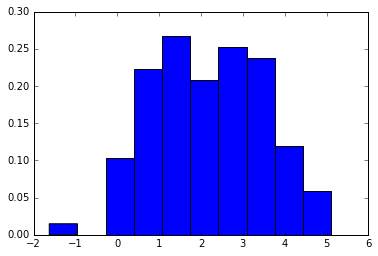

In [29]:
plt.hist(means_B,  normed=True)
plt.show()

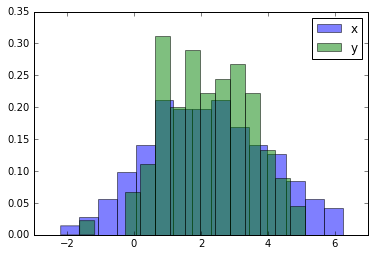

In [30]:
plt.hist(means, bins=15, alpha=0.5, normed=True, label='x')
plt.hist(means_B, bins=15, alpha=0.5, normed=True, label='y')
plt.legend(loc='upper right')
plt.show()

### Cuando la muestra es más grande, sólo se puede hacer la estimación...

In [31]:
Nsample = 12

In [32]:
mu = 12.
sd = 3.

X = stats.norm.rvs(loc=mu, scale=sd, size=Nsample)

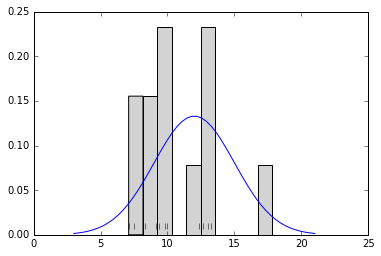

In [33]:
s = np.linspace(mu-3*sd, mu+3*sd)
f = stats.norm.pdf(s, mu, sd)
plt.plot(s, f)
plt.hist(X, normed=True, color='lightgray')
plt.plot(X, [0.01]*len(X), '|', color='k')
plt.show()

In [34]:
means_B = []
Nboot = 500

for i in range(Nboot):
    l = np.random.choice(Nsample, size=Nsample)
    S = X[list(l)]
    means_B.append(S.mean())

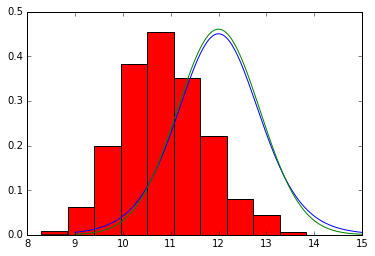

In [35]:
s = np.linspace(mu-sd, mu+sd, num=200)
f = stats.t.pdf(s, df=Nsample-1, loc=mu, scale=sd/math.sqrt(Nsample))
f2 = stats.norm.pdf(s, loc=mu, scale=sd/math.sqrt(Nsample))

plt.plot(s, f)
plt.plot(s, f2)
plt.hist(means_B,  normed=True)
plt.show()